In [1]:
import pandas as pd

In [2]:
url_c = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_d = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [3]:
data_c = pd.read_csv(url_c)
data_d = pd.read_csv(url_d)

In [4]:
def clean_data(dataset, columnName):
    clean_data = dataset.drop(['Lat', 'Long'], axis=1) \
        .melt(id_vars=['Province/State', 'Country/Region'], var_name='date', value_name=columnName) \
        .astype({'date':'datetime64[ns]', columnName:'Int64'}, errors='ignore')
    clean_data['Province/State'].fillna('<all>', inplace=True)
    clean_data[columnName].fillna(0, inplace=True)
    return clean_data

In [5]:
dataset = clean_data(data_c, 'confirmed').merge(clean_data(data_d, 'deaths'))

In [6]:
dataset

,Province/State,Country/Region,date,confirmed,deaths
0,<all>,Afghanistan,2020-01-22,0,0
1,<all>,Albania,2020-01-22,0,0
2,<all>,Algeria,2020-01-22,0,0
3,<all>,Andorra,2020-01-22,0,0
4,<all>,Angola,2020-01-22,0,0
...,...,...,...,...,...
19983,Falkland Islands (Islas Malvinas),United Kingdom,2020-04-06,2,0
19984,Saint Pierre and Miquelon,France,2020-04-06,1,0
19985,<all>,South Sudan,2020-04-06,1,0
19986,<all>,Western Sahara,2020-04-06,4,0


In [7]:
countries = dataset['Country/Region'].unique()
countries.sort()

In [8]:
dataset.sort_values(['deaths'], ascending=False)

,Province/State,Country/Region,date,confirmed,deaths
19862,<all>,Italy,2020-04-06,132547,16523
19599,<all>,Italy,2020-04-05,128948,15887
19336,<all>,Italy,2020-04-04,124632,15362
19073,<all>,Italy,2020-04-03,119827,14681
18810,<all>,Italy,2020-04-02,115242,13915
...,...,...,...,...,...
6732,<all>,Mauritius,2020-02-16,0,0
6731,<all>,Mauritania,2020-02-16,0,0
6730,<all>,Malta,2020-02-16,0,0
6729,<all>,Maldives,2020-02-16,0,0


In [9]:
print('number of countries: ' + str(len(countries)))
print(countries)

number of countries: 184
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamai

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: shape mismatch: objects cannot be broadcast to a single shape

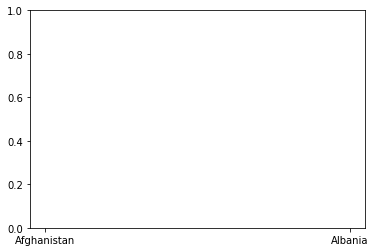

In [27]:
plt.bar(countries, dataset['deaths'])